In [1]:
%matplotlib notebook
import amfe
import matplotlib.pyplot as plt
import numpy as np
from pyfeti import utils, linalg, feti_solver
from pyfeti import feti_solver as fetisolver
import pandas as pd
from scipy import sparse
import scipy

mshfile1 = r'..\mesh\one_third_ring.inp'
mshfile2 = r'..\mesh\one_third_ring.msh'
m1 = amfe.Mesh()
m2 = amfe.Mesh()


m1.import_inp(mshfile1)
m2.import_msh(mshfile2)

Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.

*************************************************************

Loading Abaqus-mesh from ..\mesh\one_third_ring.inp
Can not read the given string list
WARNING! 2D case were selected
Mesh ..\mesh\one_third_ring.inp successfully imported. 
Assign a material to a physical group.
*************************************************************


<IPython.core.display.Javascript object>


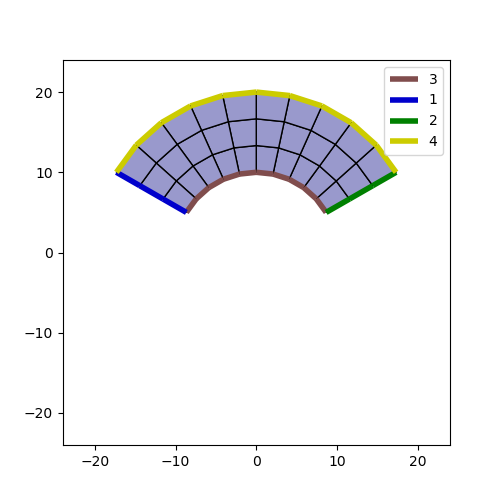

(-24.0, 24.0)

In [2]:
fig, ax1 = plt.subplots(figsize=(5,5))
amfe.plot2Dmesh(m1,ax=ax1)
lim = 1.2*np.array([-20,20])
ax1.set_xlim(lim)
ax1.set_ylim(lim)

<IPython.core.display.Javascript object>


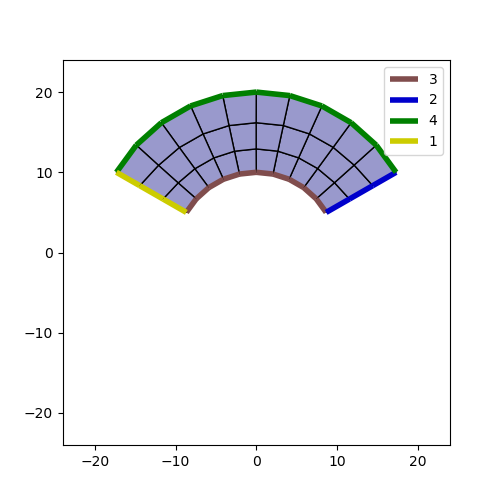

(-24.0, 24.0)

In [3]:
fig, ax2 = plt.subplots(figsize=(5,5))
amfe.plot2Dmesh(m2,ax=ax2)
lim = 1.2*np.array([-20,20])
ax2.set_xlim(lim)
ax2.set_ylim(lim)

<IPython.core.display.Javascript object>


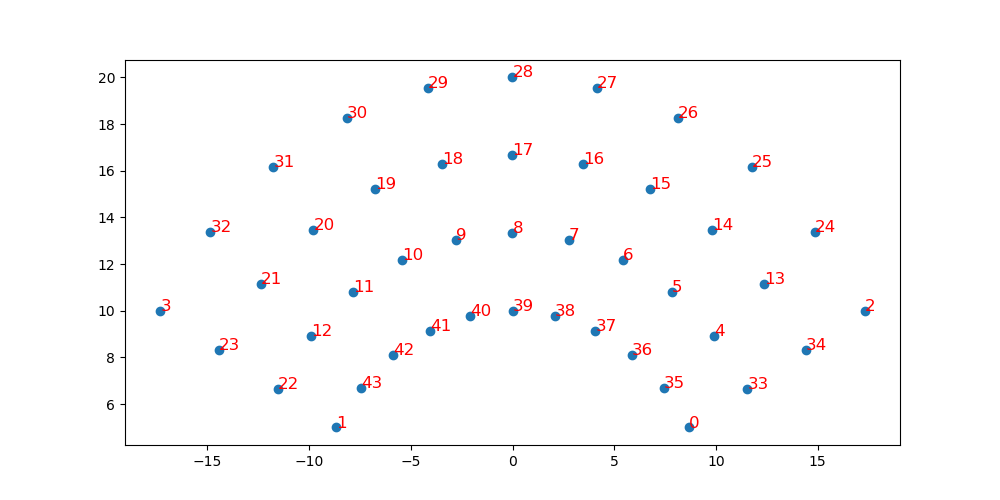

In [15]:
fig, ax3 = plt.subplots(figsize=(10,5))
amfe.plot2Dnodes(m1,ax=ax3,plot_nodeid=True)
#lim = 1.2*np.array([-20,20])
#ax3.set_xlim(lim)
#ax3.set_ylim(lim)



In [25]:
df1 = m1.el_df[m1.el_df['phys_group']==5]
print(len(df1))
df1

30


,idx_abaqus,el_type,no_of_tags,phys_group,geom_entity,no_of_mesh_partitions,partition_id,partitions_neighbors,0,1,2,3
0,1,Quad4,NaN,5,NaN,1,1,NaN,33,4,35.0,0.0
1,2,Quad4,NaN,5,NaN,1,1,NaN,34,13,4.0,33.0
2,3,Quad4,NaN,5,NaN,1,1,NaN,2,24,13.0,34.0
3,4,Quad4,NaN,5,NaN,1,1,NaN,4,5,36.0,35.0
4,5,Quad4,NaN,5,NaN,1,1,NaN,13,14,5.0,4.0
5,6,Quad4,NaN,5,NaN,1,1,NaN,24,25,14.0,13.0
6,7,Quad4,NaN,5,NaN,1,1,NaN,5,6,37.0,36.0
7,8,Quad4,NaN,5,NaN,1,1,NaN,14,15,6.0,5.0
8,9,Quad4,NaN,5,NaN,1,1,NaN,25,26,15.0,14.0
9,10,Quad4,NaN,5,NaN,1,1,NaN,6,7,38.0,37.0


<IPython.core.display.Javascript object>


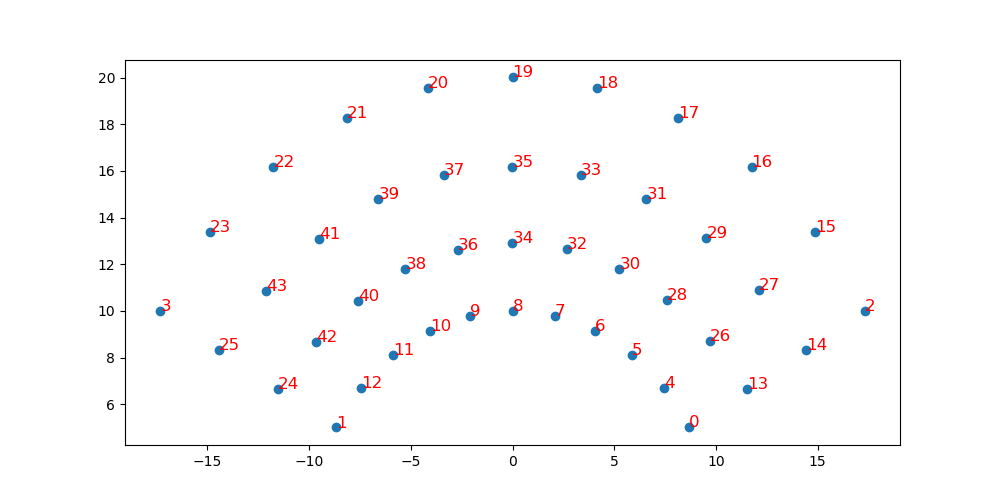

In [17]:
fig, ax4 = plt.subplots(figsize=(10,5))
amfe.plot2Dnodes(m2,ax=ax4,plot_nodeid=True)
#lim = 1.2*np.array([-20,20])
#ax4.set_xlim(lim)
#ax4.set_ylim(lim)


In [24]:
print(len(m2.el_df[m2.el_df['phys_group']==5]))
m2.el_df[m2.el_df['phys_group']==5]

30


,idx_gmsh,el_type,no_of_tags,phys_group,geom_entity,5,6,7,8
26,27,Quad4,2,5,1,0,4,26.0,13.0
27,28,Quad4,2,5,1,13,26,27.0,14.0
28,29,Quad4,2,5,1,14,27,15.0,2.0
29,30,Quad4,2,5,1,4,5,28.0,26.0
30,31,Quad4,2,5,1,26,28,29.0,27.0
31,32,Quad4,2,5,1,27,29,16.0,15.0
32,33,Quad4,2,5,1,5,6,30.0,28.0
33,34,Quad4,2,5,1,28,30,31.0,29.0
34,35,Quad4,2,5,1,29,31,17.0,16.0
35,36,Quad4,2,5,1,6,7,32.0,30.0


In [26]:
from amfe.wrappers import ansys_wrapper as ansys

In [30]:
K_ansys = ansys.read_ansys_sparse_matrix('../ansys_matrices/Ksparse.txt')

In [33]:
K_ansys.max()

406600000000.0